In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import norm
import statistics
from matplotlib.cbook import boxplot_stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

In [27]:
df = pd.read_csv('students.csv')

In [28]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [29]:
# Verificação de dados em branco por variáveis independentes (não foi necessária nenhum condicionamento)
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [30]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [31]:
# Fazendo uma discriminação entre as variáveis numéricas e categóricas
numericals = ['Age at enrollment',
              'Curricular units 1st sem (credited)',
              'Curricular units 1st sem (enrolled)',
              'Curricular units 1st sem (evaluations)',
              'Curricular units 1st sem (approved)',
              'Curricular units 1st sem (grade)',
              'Curricular units 1st sem (without evaluations)',
              'Curricular units 2nd sem (credited)',
              'Curricular units 2nd sem (enrolled)',
              'Curricular units 2nd sem (evaluations)',
              'Curricular units 2nd sem (approved)',
              'Curricular units 2nd sem (grade)',
              'Curricular units 2nd sem (without evaluations)',
              'Unemployment rate',
              'Inflation rate', 
              'GDP']

In [32]:
categoricals = ['Marital status', 
                'Application mode', 
                'Course',
                'Daytime/evening attendance', 
                'Previous qualification', 
                'Nacionality',
                'Mother\'s qualification', 
                'Father\'s qualification',
                'Mother\'s occupation', 
                'Father\'s occupation', 
                'Displaced',
                'Educational special needs', 
                'Debtor', 
                'Tuition fees up to date',
                'Gender', 
                'Scholarship holder', 
                'International',
                'Target']

In [33]:
# Matriz de correlação para variáveis numéricas (infelizmente a variável dependente é categórica e do tipo string de dado)
# Fazendo aquele esquema de 0 e 1 para "Target" seria interessante para destacar as correlações dela com as independentes
x = df[numericals]
x.corr()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Age at enrollment,1.000000,0.226837,0.141327,0.139911,-0.053405,-0.156616,0.057470,0.207561,0.085914,0.056286,-0.112052,-0.173419,0.061654,0.025018,0.025377,-0.064678
Curricular units 1st sem (credited),0.226837,1.000000,0.774344,0.542919,0.628394,0.122978,0.116262,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256,0.009778,0.023348,-0.026513
Curricular units 1st sem (enrolled),0.141327,0.774344,1.000000,0.680220,0.769083,0.376996,0.129337,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547,0.038404,0.036758,-0.026262
Curricular units 1st sem (evaluations),0.139911,0.542919,0.680220,1.000000,0.522396,0.418038,0.241800,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296,0.061545,-0.006604,-0.099761
Curricular units 1st sem (approved),-0.053405,0.628394,0.769083,0.522396,1.000000,0.696113,-0.013360,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983,0.051286,-0.007114,0.018459
Curricular units 1st sem (grade),-0.156616,0.122978,0.376996,0.418038,0.696113,1.000000,-0.071660,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076,0.014821,-0.033904,0.054801
Curricular units 1st sem (without evaluations),0.057470,0.116262,0.129337,0.241800,-0.013360,-0.071660,1.000000,0.117359,0.109924,0.144683,-0.013070,-0.061482,0.583261,-0.045144,-0.052534,-0.144673
Curricular units 2nd sem (credited),0.207561,0.944811,0.753747,0.522187,0.607661,0.113937,0.117359,1.000000,0.676258,0.430978,0.519081,0.129770,0.070148,0.010580,0.014490,-0.024491
Curricular units 2nd sem (enrolled),0.085914,0.644826,0.942627,0.611842,0.733772,0.406167,0.109924,0.676258,1.000000,0.604821,0.703258,0.395135,0.067697,0.064436,0.016844,-0.007592
Curricular units 2nd sem (evaluations),0.056286,0.427845,0.599567,0.778863,0.539934,0.487236,0.144683,0.430978,0.604821,1.000000,0.463535,0.453394,0.144877,0.045808,-0.012643,-0.004854


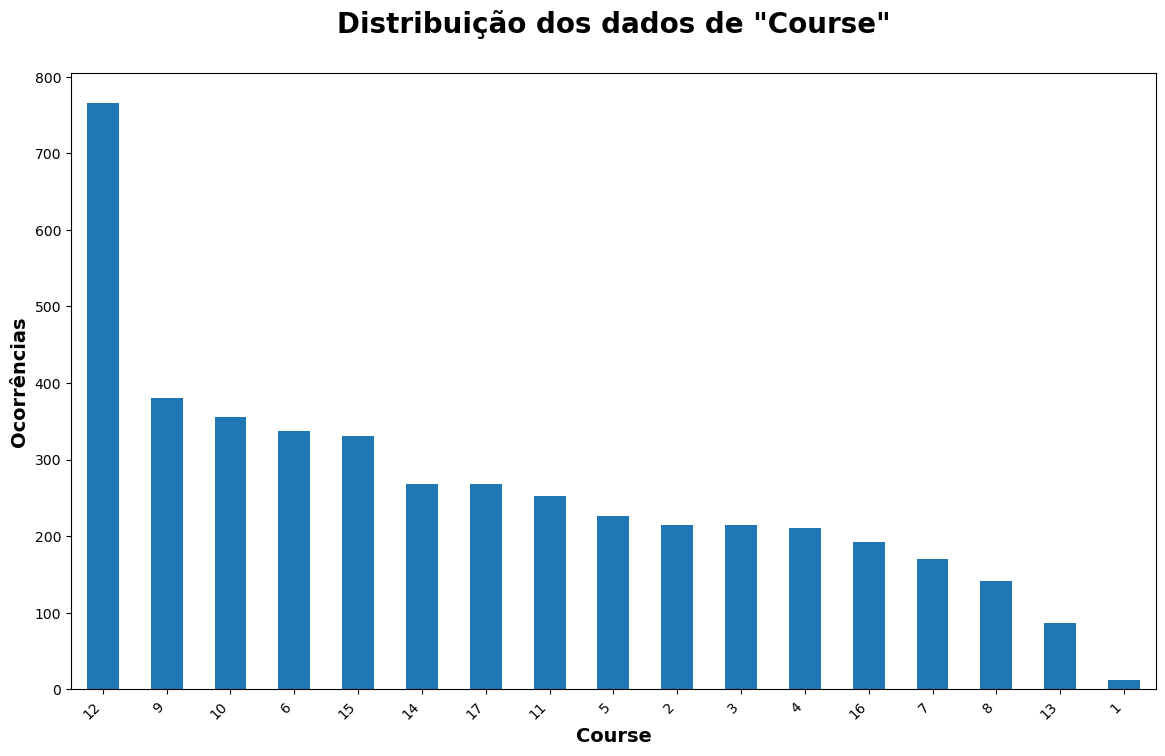

In [34]:
# Distribuição dos dados para as variáveis categóricas para verificar a frequência para cada categoria das variáveis
df['Course'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Course"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Course',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

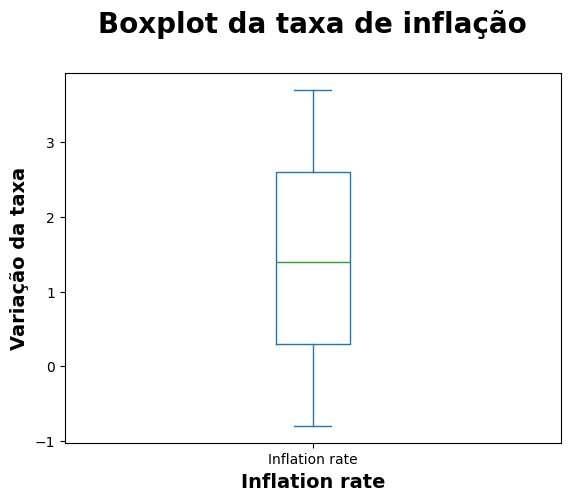

In [35]:
# Boxplot para as numéricas e contínuas para verificar se há valores discrepantes
df[['Inflation rate']].plot(kind='box')
plt.title('Boxplot da taxa de inflação\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Variação da taxa',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Inflation rate',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

In [36]:
# Distribuição das variáveis numéricas (com curva normal)
def curva_normal(df):
    mu, std = norm.fit(df) 
    # Plot
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)

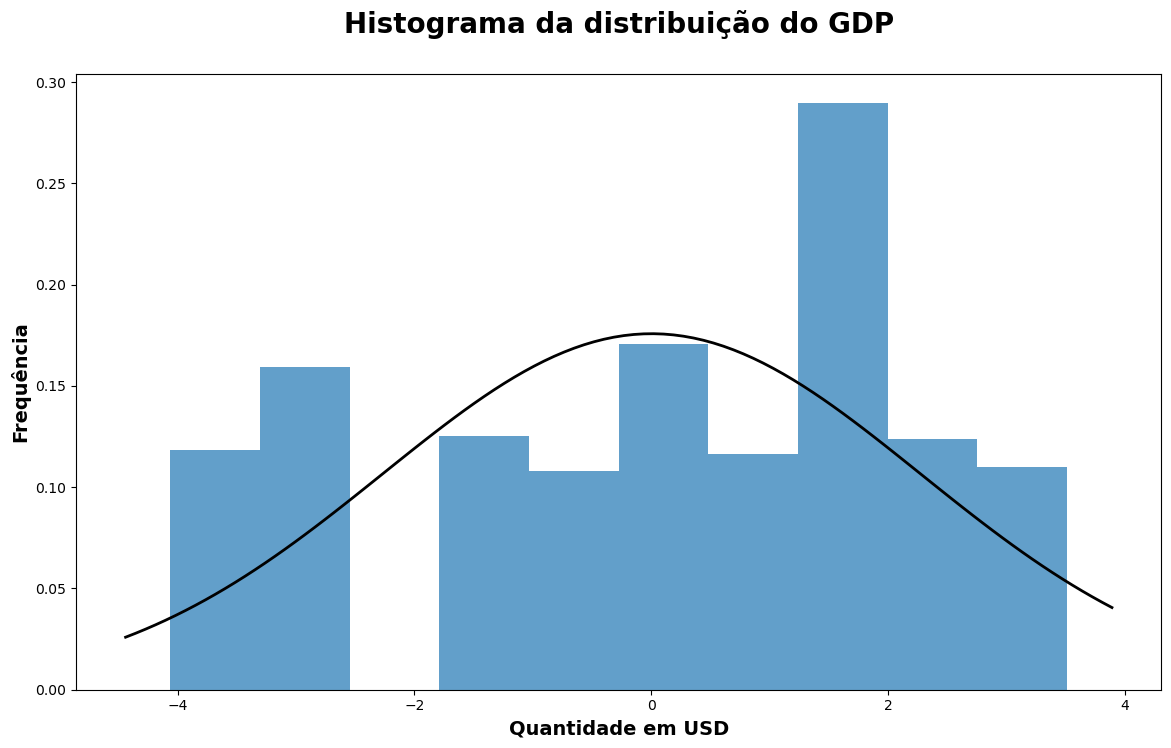

In [37]:

contagem, tam_coluna = np.histogram(df['GDP'])

df[['GDP']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8),legend=None)
plt.title('Histograma da distribuição do GDP\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Quantidade em USD',fontdict = {'fontsize':14,'fontweight':'bold'})
curva_normal(df[['GDP']])